<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/Micro_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [4]:
  data=pd.read_csv("/content/Warranty_Claim_Dataset.csv")

In [5]:
data

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,East,Tamil Nadu,Rural,Ranchi,Personal,Household,Refrigerator,0,0,0,0,1,18706,17,80,Online Store,0.8,Complaint,0
1,West,Jharkhand,Urban,Ranchi,Personal,Electronics,TV,0,0,0,1,0,46245,14,25,Manufacturer,3.0,Claim,0
2,West,Karnataka,Urban,Chennai,Business,Household,Microwave,0,0,1,0,0,12096,18,93,Dealer,4.7,Complaint,0
3,Central,Karnataka,Urban,Chennai,Business,Furniture,TV,1,1,0,1,1,9147,19,86,Dealer,2.7,Complaint,0
4,North East,Haryana,Rural,Mumbai,Personal,Entertainment,Refrigerator,1,1,0,1,1,15441,5,74,Dealer,3.4,Complaint,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100658,North,Delhi,Rural,Delhi,Personal,Furniture,Refrigerator,0,0,1,1,1,45503,10,21,Online Store,3.0,Complaint,0
100659,North East,Maharashtra,Rural,Delhi,Business,Electronics,TV,0,1,0,2,2,16989,14,85,Manufacturer,2.3,Claim,0
100660,North East,Tamil Nadu,Rural,Delhi,Business,Entertainment,AC,0,0,1,0,2,14069,5,118,Manufacturer,2.4,Claim,0
100661,Central,Jharkhand,Urban,Delhi,Personal,Household,Microwave,1,2,1,2,0,35455,7,101,Online Store,2.4,Claim,0


In [6]:
df=pd.DataFrame(data)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Fraud'].value_counts()

,count
Fraud,
0,90697
1,9966


In [9]:
for col in df.columns:
  print(f"--- Value Counts for '{col}' ---")
  print(df[col].value_counts())
  print("\n")

--- Value Counts for 'Region' ---
Region
North         16910
South         16837
West          16825
Central       16813
North East    16679
East          16599
Name: count, dtype: int64


--- Value Counts for 'State' ---
State
Maharashtra    16897
Jharkhand      16889
Delhi          16804
Karnataka      16760
Haryana        16661
Tamil Nadu     16652
Name: count, dtype: int64


--- Value Counts for 'Area' ---
Area
Rural    50371
Urban    50292
Name: count, dtype: int64


--- Value Counts for 'City' ---
City
Mumbai        16912
Bangalore     16898
Delhi         16778
Ranchi        16757
Chandigarh    16711
Chennai       16607
Name: count, dtype: int64


--- Value Counts for 'Consumer_profile' ---
Consumer_profile
Personal    50381
Business    50282
Name: count, dtype: int64


--- Value Counts for 'Product_category' ---
Product_category
Furniture        25292
Entertainment    25197
Household        25120
Electronics      25054
Name: count, dtype: int64


--- Value Counts for 'Product_ty

In [10]:
for i in df.columns:
  print(f"{str(i)}",df[i].isnull().sum())

Region 0
State 0
Area 0
City 0
Consumer_profile 0
Product_category 0
Product_type 0
AC_1001_Issue 0
AC_1002_Issue 0
TV_2001_Issue 0
TV_2002_Issue 0
TV_2003_Issue 0
Claim_Value 0
Service_Centre 0
Product_Age 0
Purchased_from 0
Call_details 0
Purpose 0
Fraud 0


<Axes: xlabel='Region', ylabel='Claim_Value'>

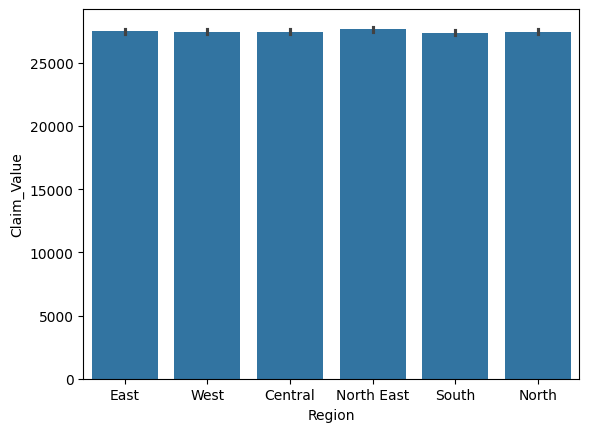

In [11]:
sns.barplot(x=df['Region'],y=df['Claim_Value'])

<Axes: xlabel='State', ylabel='Claim_Value'>

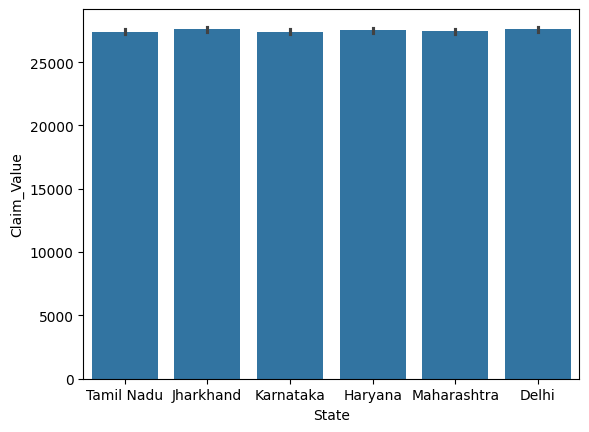

In [12]:
sns.barplot(x=df['State'],y=df['Claim_Value'])

<Axes: xlabel='Area', ylabel='Claim_Value'>

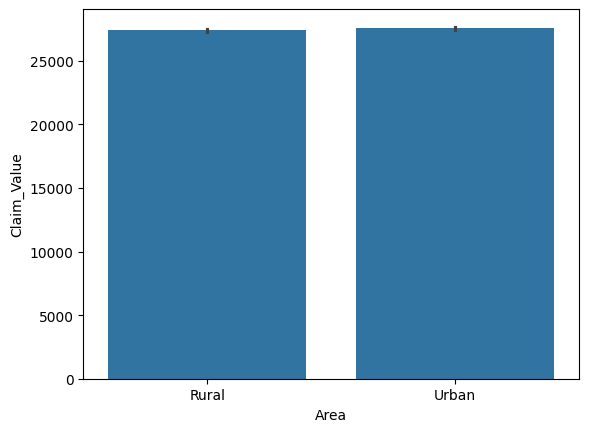

In [13]:
sns.barplot(x='Area',y='Claim_Value',data=df)

<Axes: xlabel='Fraud', ylabel='Region'>

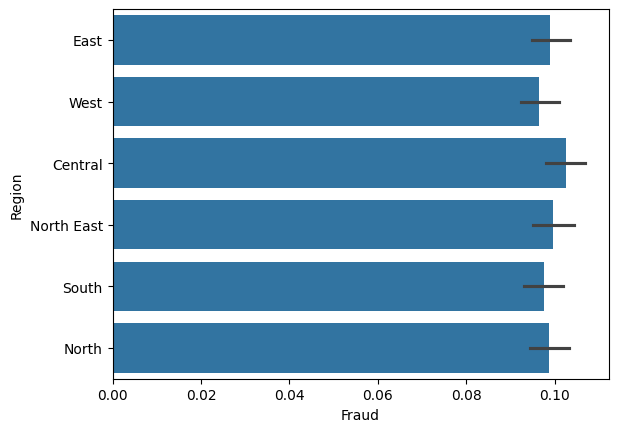

In [14]:
sns.barplot(x='Fraud',y='Region',data=df)

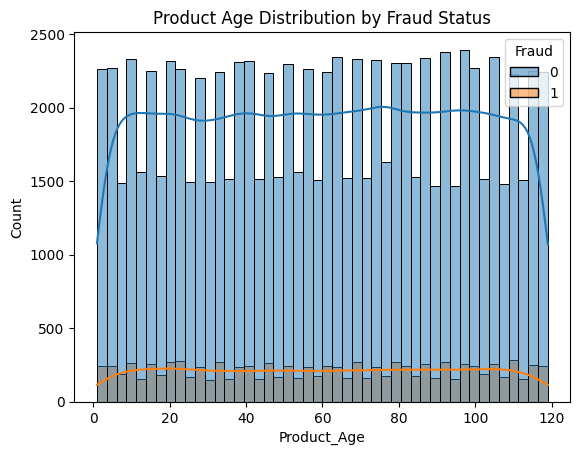

In [15]:

sns.histplot(data=df, x='Product_Age', hue='Fraud', kde=True)
plt.title('Product Age Distribution by Fraud Status')
plt.show()

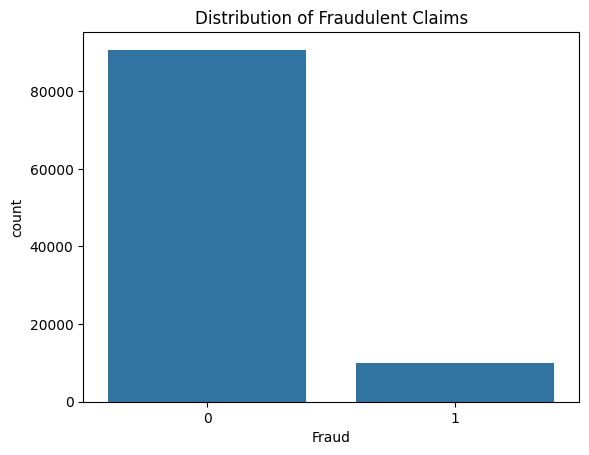

In [16]:
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Claims')
plt.show()

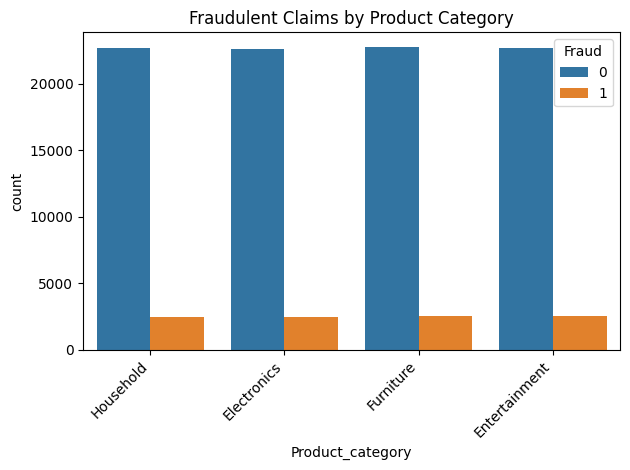

In [17]:
sns.countplot(x='Product_category', hue='Fraud', data=df)
plt.title('Fraudulent Claims by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

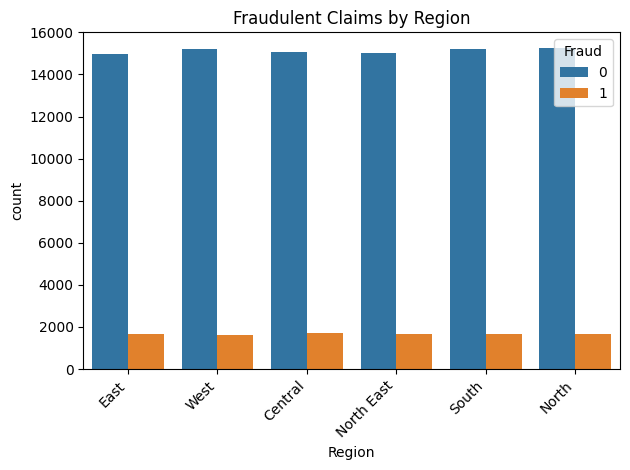

In [18]:
# Analyze warranty claims by region
sns.countplot(x='Region', hue='Fraud', data=df)
plt.title('Fraudulent Claims by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

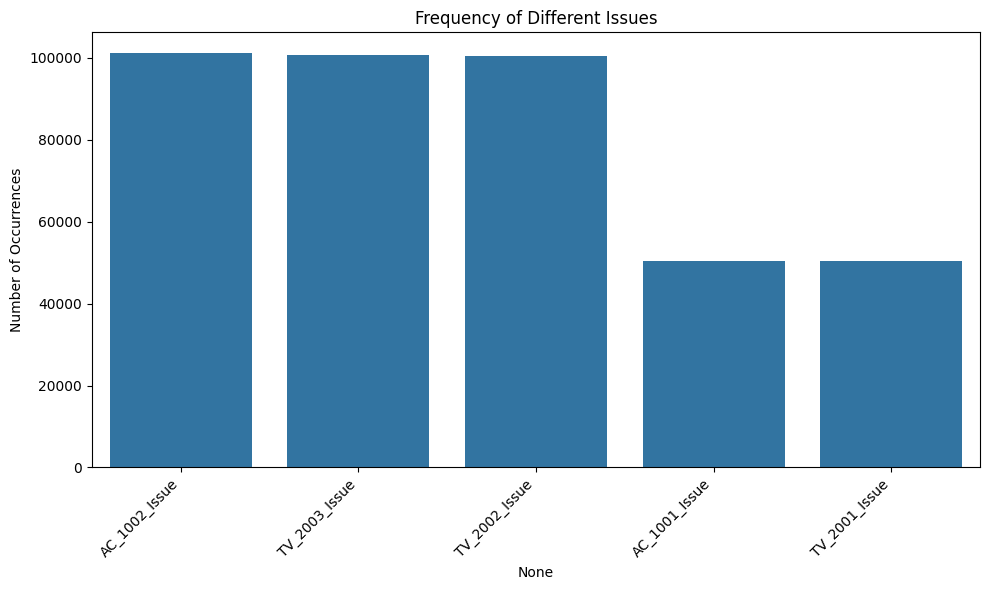

In [19]:
issue_cols = ['AC_1001_Issue', 'AC_1002_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']
issue_counts = df[issue_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=issue_counts.index, y=issue_counts.values)
plt.title('Frequency of Different Issues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

Issues by product type

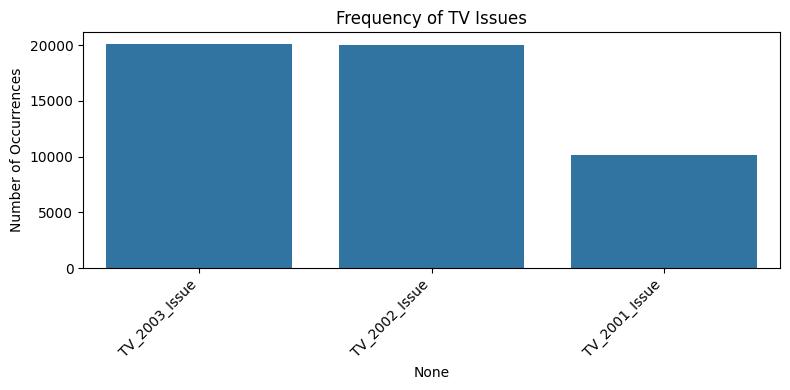

In [20]:
# And for TV issues:
tv_issues = df[df['Product_type'] == 'TV'][['TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']]
tv_issue_counts = tv_issues.sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=tv_issue_counts.index, y=tv_issue_counts.values)
plt.title('Frequency of TV Issues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

<Axes: xlabel='Fraud', ylabel='Consumer_profile'>

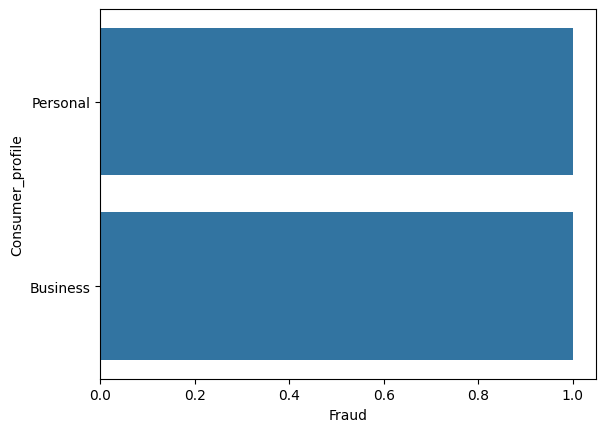

In [21]:
fraudulent_claims_df = df[df['Fraud'] == 1]
sns.barplot(y=fraudulent_claims_df['Consumer_profile'], x=fraudulent_claims_df['Fraud'])

In [22]:
df.shape

(100663, 19)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_encoded=df.copy()
cat_cols=['Consumer_profile',	'Product_category',	'Product_type', 'Purchased_from', 'Purpose','Region',	'State',	'Area'	,'City']
for i in cat_cols:
  df_encoded[i] = le.fit_transform(df_encoded[i])
df_encoded.shape

(100663, 19)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_encoded['Claim_Value']=scaler.fit_transform(df_encoded[['Claim_Value']])

In [25]:
y=df_encoded['Fraud']
X=df_encoded.drop('Fraud',axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

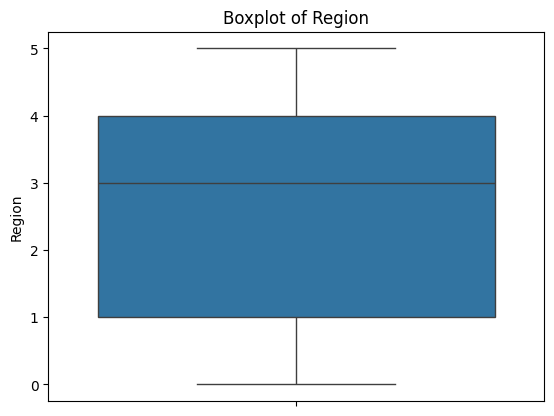

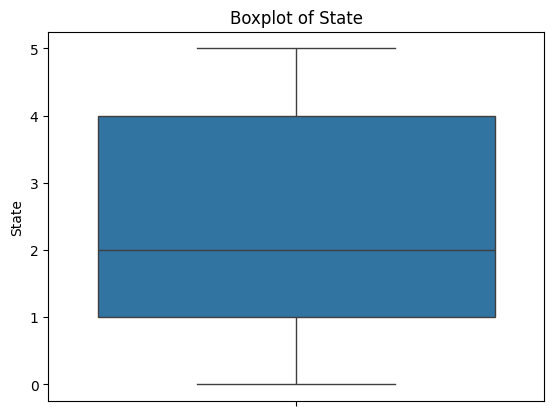

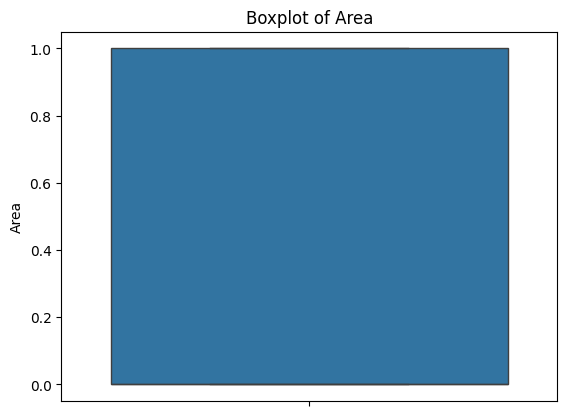

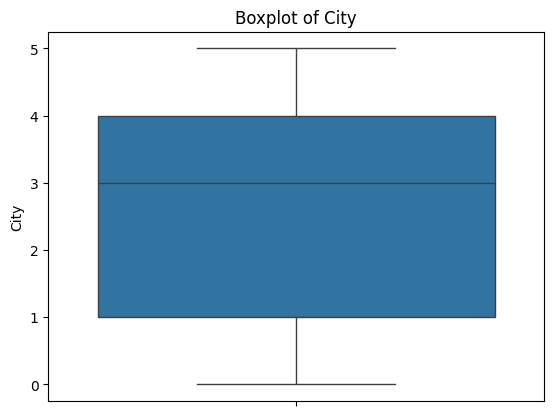

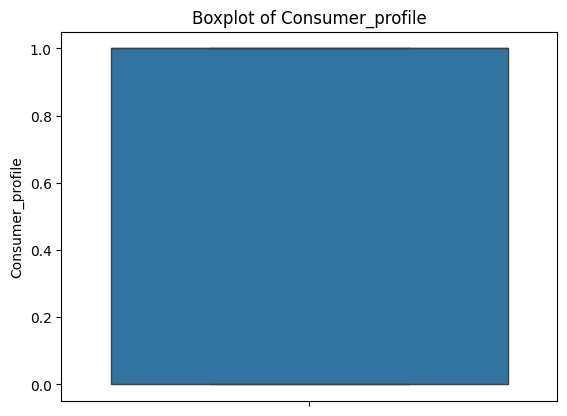

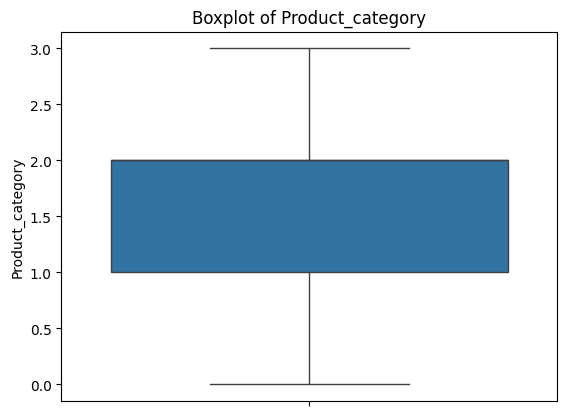

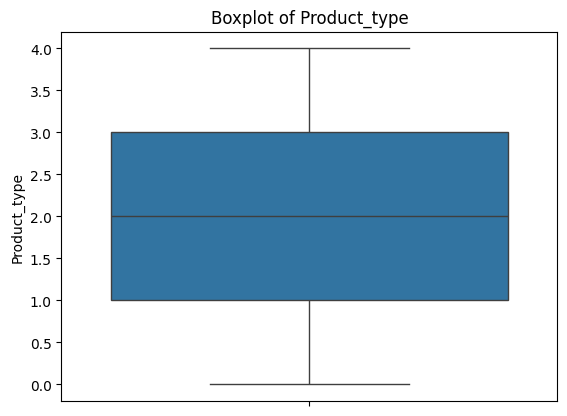

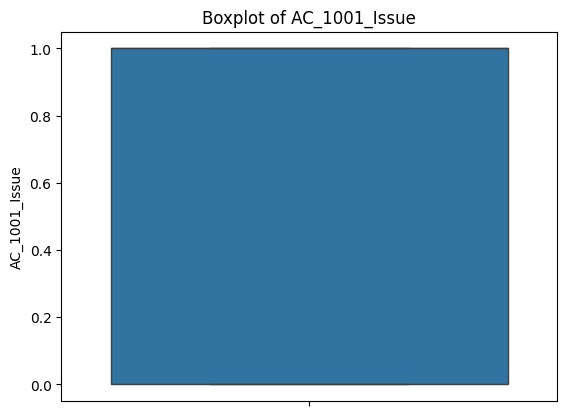

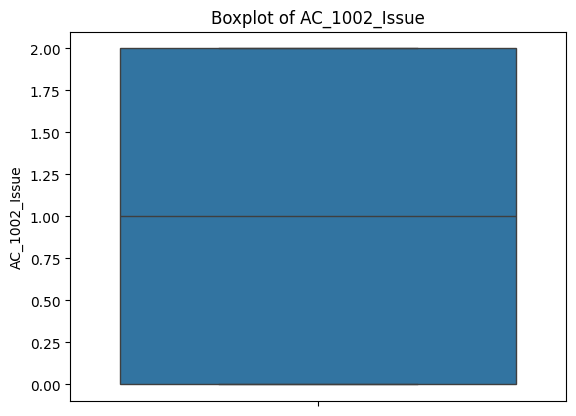

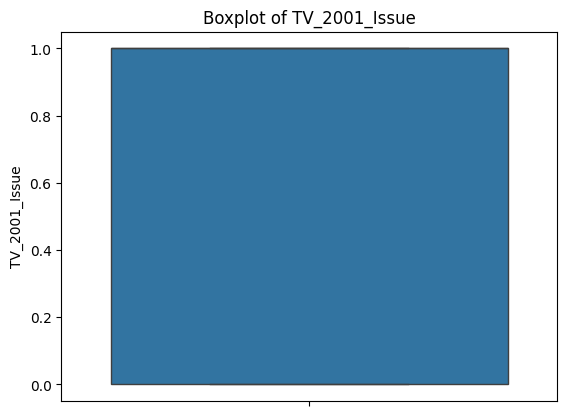

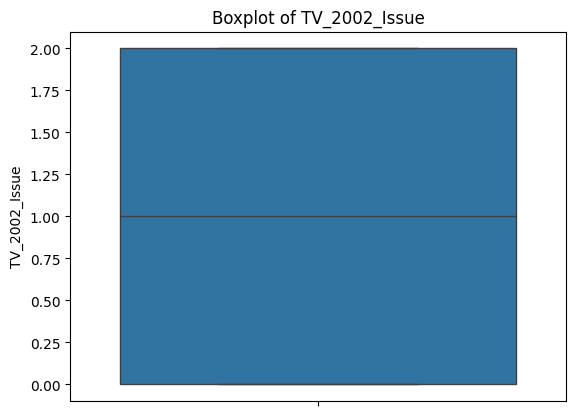

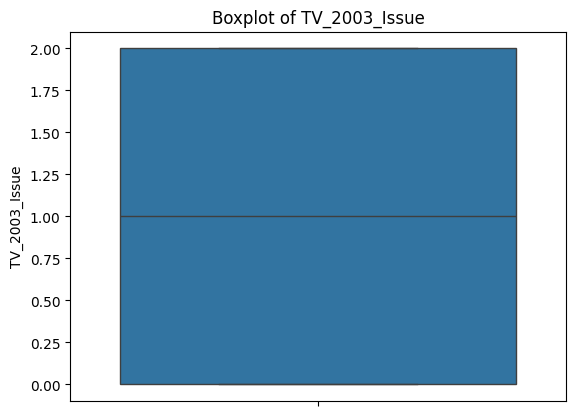

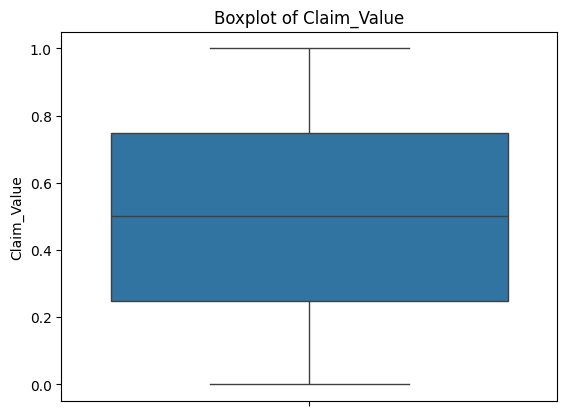

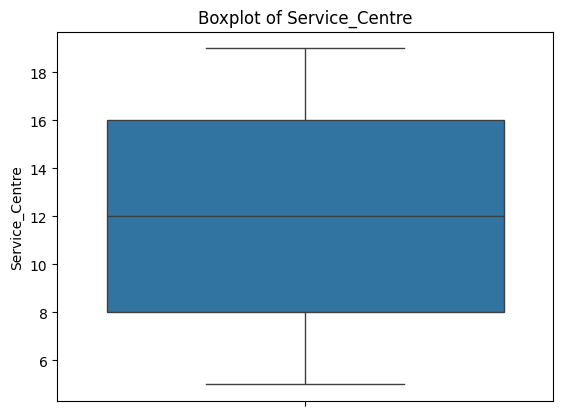

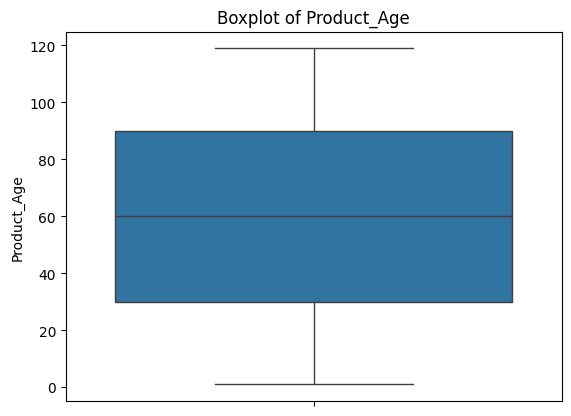

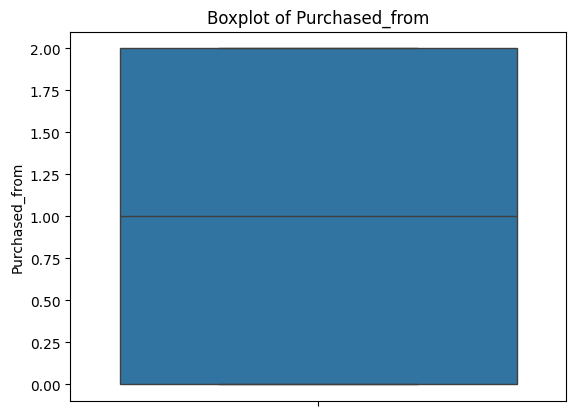

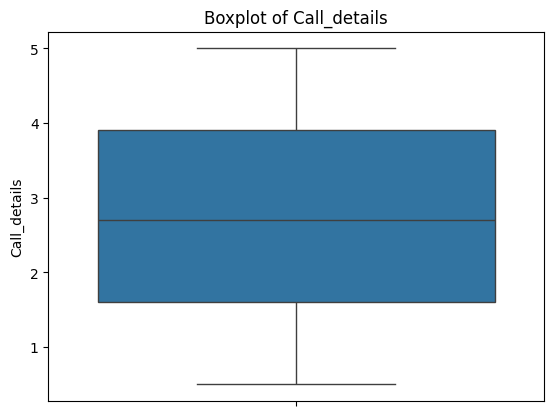

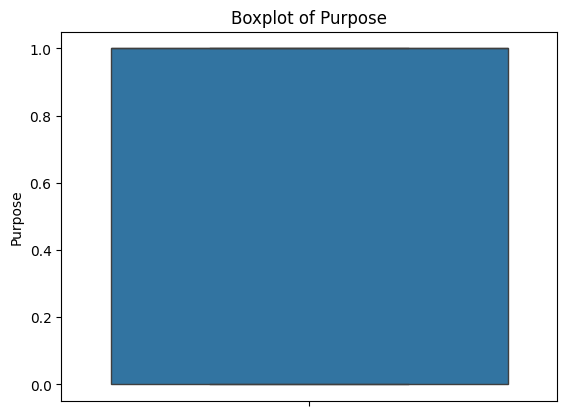

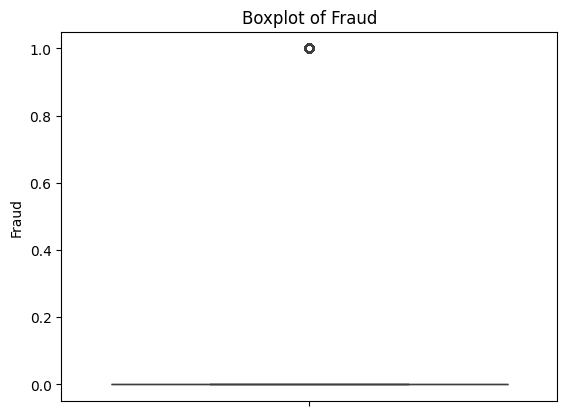

In [27]:
for i in df_encoded.columns:
  plt.figure()
  sns.boxplot(data=df_encoded[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['f1_score','precision','recall','accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='f1_score', patience=3)])

Epoch 1/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6332 - f1_score: 0.1814 - loss: 0.7047 - precision: 0.1008 - recall: 0.3400 - val_accuracy: 0.9048 - val_f1_score: 0.1716 - val_loss: 0.3428 - val_precision: 0.0435 - val_recall: 6.6138e-04
Epoch 2/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8711 - f1_score: 0.1868 - loss: 0.3996 - precision: 0.1106 - recall: 0.0361 - val_accuracy: 0.9061 - val_f1_score: 0.1716 - val_loss: 0.3133 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8948 - f1_score: 0.1834 - loss: 0.3556 - precision: 0.1186 - recall: 0.0067 - val_accuracy: 0.9061 - val_f1_score: 0.1716 - val_loss: 0.3130 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8966 - f1_score: 0.1839 - loss: 0.3500 - precision: 0.1180 - recall: 0.0033 - val_accuracy: 0.9061 - val_f1_score: 0.1716 - val_loss: 0.3130 - val_p

In [31]:
model.evaluate(X_test,y_test)

630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9030 - f1_score: 0.1768 - loss: 0.3203 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.32409921288490295, 0.17957410216331482, 0.0, 0.0, 0.9013559818267822]

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)

Shape of X_train before SMOTE: (80530, 18)
Shape of X_train after SMOTE: (145100, 18)
Shape of y_train before SMOTE: (80530,)
Shape of y_train after SMOTE: (145100,)


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print("Shape of X_test before SMOTE:", X_test.shape)
print("Shape of X_test after SMOTE:", X_test_smote.shape)
print("Shape of y_test before SMOTE:", y_test.shape)
print("Shape of y_test after SMOTE:", y_test_smote.shape)

Shape of X_test before SMOTE: (20133, 18)
Shape of X_test after SMOTE: (36294, 18)
Shape of y_test before SMOTE: (20133,)
Shape of y_test after SMOTE: (36294,)


In [34]:
print("Value counts of 'Fraud' before SMOTE:")
print(y_train.value_counts())

print("\nValue counts of 'Fraud' after SMOTE:")
print(y_train_smote.value_counts())

Value counts of 'Fraud' before SMOTE:
Fraud
0    72550
1     7980
Name: count, dtype: int64

Value counts of 'Fraud' after SMOTE:
Fraud
1    72550
0    72550
Name: count, dtype: int64


In [35]:
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='f1_score', patience=3)])

Epoch 1/10
3628/3628 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.6386 - f1_score: 0.5459 - loss: 0.7395 - precision: 0.5520 - recall: 0.1108 - val_accuracy: 0.5839 - val_f1_score: 1.0000 - val_loss: 0.6966 - val_precision: 1.0000 - val_recall: 0.5839
Epoch 2/10
3628/3628 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7084 - f1_score: 0.5448 - loss: 0.5772 - precision: 0.6467 - recall: 0.4870 - val_accuracy: 0.6376 - val_f1_score: 1.0000 - val_loss: 0.6450 - val_precision: 1.0000 - val_recall: 0.6376
Epoch 3/10
3628/3628 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7171 - f1_score: 0.5445 - loss: 0.5672 - precision: 0.6574 - recall: 0.5092 - val_accuracy: 0.6778 - val_f1_score: 1.0000 - val_loss: 0.6013 - val_precision: 1.0000 - val_recall: 0.6778
Epoch 4/10
3628/3628 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7209 - f1_score: 0.5459 - loss: 0.5615 - precision: 0.6660 - recall: 0.5148 - val_accuracy: 0.6476 - val_f1_score: 1.0000 - val_loss: 0.6394 - val_precision: 1.0000 -

In [36]:
model.evaluate(X_train_smote,y_train_smote)

4535/4535 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7579 - f1_score: 0.3214 - loss: 0.5162 - precision: 0.3237 - recall: 0.3226


[0.5621861815452576,
 0.6666666269302368,
 0.7854881882667542,
 0.5952171087265015,
 0.7163335680961609]

In [37]:
model.evaluate(X_test_smote,y_test_smote)

1135/1135 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7587 - f1_score: 0.3190 - loss: 0.5162 - precision: 0.3205 - recall: 0.3202


[0.5573250651359558,
 0.6666666269302368,
 0.7886289954185486,
 0.6038463711738586,
 0.7210007309913635]

630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix Before SMOTE:


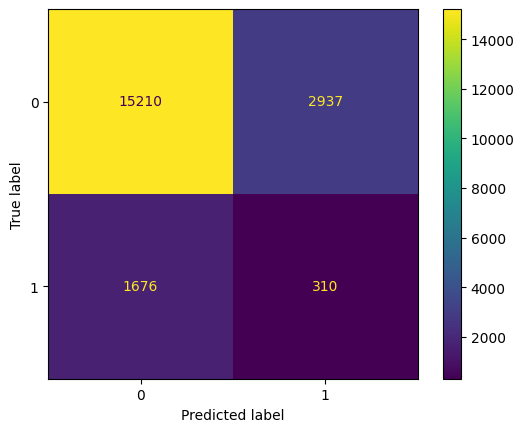

1135/1135 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Confusion Matrix After SMOTE:


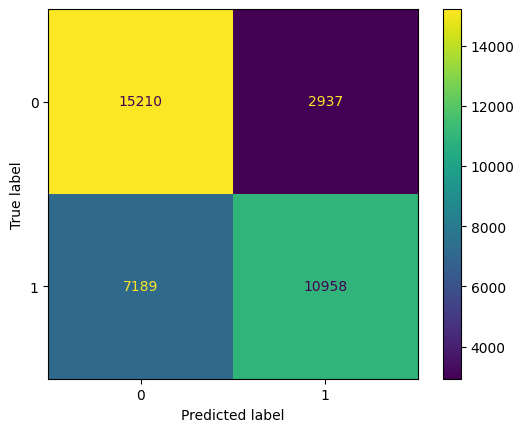

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred_before_smote = (model.predict(X_test) > 0.5).astype("int32")
cm_before_smote = confusion_matrix(y_test, y_pred_before_smote)

print("Confusion Matrix Before SMOTE:")
disp_before_smote = ConfusionMatrixDisplay(confusion_matrix=cm_before_smote)
disp_before_smote.plot()
plt.show()


y_pred_after_smote = (model.predict(X_test_smote) > 0.5).astype("int32")
cm_after_smote = confusion_matrix(y_test_smote, y_pred_after_smote)

print("\nConfusion Matrix After SMOTE:")
disp_after_smote = ConfusionMatrixDisplay(confusion_matrix=cm_after_smote)
disp_after_smote.plot()
plt.show()